# 그래디언트 부스팅 예측

In [155]:
# 데이터 구성 : Series, DataFrame
import pandas as pd
# 데이터 시각화 
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
#graphviz: 나무구조 시각화(.dot확장자 파일 불러오기 등)
import graphviz

In [156]:
df_raw = pd.read_csv("3. Big Data 분석/Concrete.csv",encoding= 'cp949')
df_raw.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate  age  strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30

In [157]:
df_raw_y = df_raw["strength"]
df_raw_x = df_raw.drop("strength", axis =1, inplace = False)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4, random_state=1234)

### strength를 목표변수로 정해서 test 데이터 40%, training 데이터 60%로 나눈다.

In [158]:
df_raw.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate  age  strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30

## 모델 생성

In [159]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

Score on training set: 0.951
Score on test set: 0.915


In [160]:
gb_uncustomized

GradientBoostingRegressor(random_state=1234)

# 2.모델 파라미터 조정 

In [161]:
train_score =[]; test_score=[]
para_n_tree = [n_tree * 10 for n_tree in range(1, 61)]
for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state=1234,n_estimators=v_n_estimators)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

df_score_n = pd.DataFrame()
df_score_n["Estimators"]= para_n_tree
df_score_n["TrainScore"]= train_score
df_score_n["TestScore"]=test_score

df_score_n.round(3)

Estimators  TrainScore  TestScore
0           10       0.646      0.621
1           20       0.807      0.773
2           30       0.870      0.835
3           40       0.898      0.863
4           50       0.915      0.878
5           60       0.925      0.888
6           70       0.934      0.898
7           80       0.940      0.904
8           90       0.946      0.910
9          100       0.951      0.915
10         110       0.954      0.917
11         120       0.957      0.920
12         130       0.960      0.922
13         140       0.963      0.925
14         150       0.965      0.926
15         160       0.967      0.929
16         170       0.969      0.930
17         180       0.970      0.931
18         190       0.972      0.933
19         200       0.973      0.933
20         210       0.974      0.934
21         220       0.975      0.935
22         230       0.976      0.935
23         240       0.977      0.935
24         250       0.977      0.936
25         260       0.978      0.937
26         270       0.979      0.937
27         280       0.979      0.937
28         290       0.980      0.938
29         300       0.981      0.938
30         310       0.981      0.938
31         320       0.981      0.939
32         330       0.982      0.939
33         340       0.982      0.939
34         350       0.983      0.940
35         360       0.983      0.940
36         370       0.984      0.940
37         380       0.984      0.940
38         390       0.985      0.941
39         400       0.985      0.941
40         410       0.985      0.941
41         420       0.986      0.941
42         430       0.986      0.941
43         440       0.986      0.942
44         450       0.986      0.942
45         460       0.987      0.942
46         470       0.987      0.942
47         480       0.987      0.942
48         490       0.987      0.943
49         500       0.988      0.943
50         510       0.988      0.943
51         520       0.988      0.943
52         530       0.988      0.943
53         540       0.988      0.943
54         550       0.989      0.943
55         560       0.989      0.943
56         570       0.989      0.943
57         580       0.989      0.943
58         590       0.989      0.943
59         600       0.989      0.943

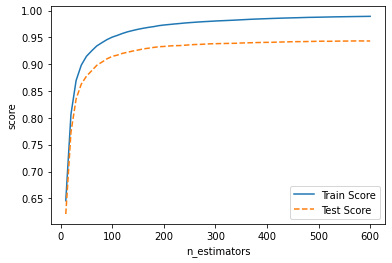

In [162]:
plt.plot(para_n_tree,train_score,linestyle="-", label = "Train Score")
plt.plot(para_n_tree,test_score,linestyle="--", label = "Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

## 트리 개수 n에 따라 Train과 Test의 설명력이 점점 증가한다는 사실을 확인했다.
## 그러나 54 이후에는 n을 증가시켜도 변화가 없기 때문에 n을 54로 지정했다.

# 모델 파라미터 조정 - min_samples_leaf: 입사귀 노드의 최소 자료수 변경

In [163]:
#train 및 test설명력 결과저장
train_score =[]
test_score=[]

para_leaf =[n_leaf * 1 for n_leaf in range(1,21)]
for v_min_samples_leaf in para_leaf:
    rf = GradientBoostingRegressor(random_state=1234, n_estimators=54, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


In [164]:
#결과저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]= para_leaf
df_score_leaf["TrainScore"]= train_score
df_score_leaf["TestScore"]= test_score

df_score_leaf.round(3)

MinSamplesLeaf  TrainScore  TestScore
0                1       0.919      0.882
1                2       0.919      0.882
2                3       0.915      0.880
3                4       0.916      0.882
4                5       0.916      0.882
5                6       0.914      0.885
6                7       0.913      0.881
7                8       0.914      0.883
8                9       0.912      0.884
9               10       0.913      0.882
10              11       0.913      0.883
11              12       0.913      0.881
12              13       0.912      0.879
13              14       0.909      0.882
14              15       0.908      0.880
15              16       0.907      0.882
16              17       0.908      0.879
17              18       0.905      0.876
18              19       0.908      0.880
19              20       0.906      0.876

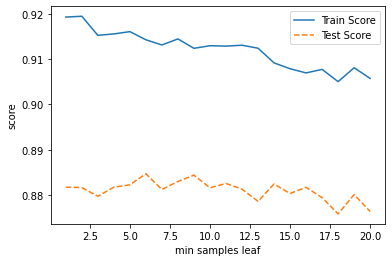

In [165]:
plt.plot(para_leaf,train_score,linestyle="-", label = "Train Score")
plt.plot(para_leaf,test_score,linestyle="--", label = "Test Score")
plt.ylabel("score")
plt.xlabel("min samples leaf")
plt.legend()

## 최소 잎사귀가 7개일 때 Train과 Test 간격이 가장 작으므르 7로 지정한다.

## 모델 parameter조정 min_samples_split: 분리 노드의 최소 자료수 변경

In [166]:
#trin 및 test설명력 결과저장
train_score=[]; test_score=[]
#min_samples_split: 분리노드의 최소자료수 
para_split = [n_split *2 for n_split in range(2,21)]
for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=54, min_samples_leaf=7,min_samples_split=v_min_samples_split)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
#결과저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"]= para_split
df_score_split["TrainScore"]=train_score
df_score_split["TestScore"]=test_score
df_score_split.round(3)

MinSamplesSplit  TrainScore  TestScore
0                 4       0.913      0.881
1                 6       0.913      0.881
2                 8       0.913      0.881
3                10       0.913      0.881
4                12       0.913      0.881
5                14       0.913      0.881
6                16       0.913      0.881
7                18       0.913      0.881
8                20       0.913      0.880
9                22       0.913      0.881
10               24       0.913      0.881
11               26       0.914      0.881
12               28       0.914      0.882
13               30       0.912      0.882
14               32       0.912      0.881
15               34       0.913      0.882
16               36       0.913      0.883
17               38       0.910      0.878
18               40       0.909      0.876

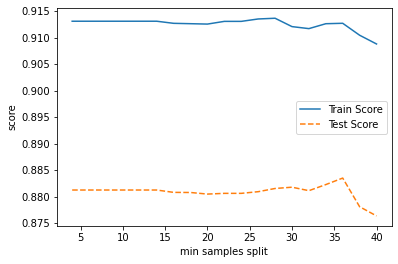

In [167]:
#모델 설명력 그래프 확인
plt.plot(para_split,train_score,linestyle="-",label ="Train Score")
plt.plot(para_split,test_score,linestyle="--",label= "Test Score")
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

### 36정도에서 차이가 가장 작은 것을 알 수 있다.

## 모델 parameter조정 max_depth: 트리의 최대 깊이 조정

In [168]:
# max_depth: 최대 깊이 변경에 따른 모델 성능
#train 및 test설명력 결과 저장
train_score =[]; test_score=[]
#max_depth: 최대 깊이 변경
para_depth =[depth for depth in range(1,11)]
for v_max_depth in para_depth:
    gb=GradientBoostingRegressor(random_state=1234, n_estimators=54, min_samples_leaf=7, min_samples_split=36,max_depth=v_max_depth)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_score_depth= pd.DataFrame()
df_score_depth["Depth"]=para_depth
df_score_depth["TrainScore"]=train_score
df_score_depth["TestScore"]=test_score

df_score_depth.round(3)

Depth  TrainScore  TestScore
0      1       0.729      0.707
1      2       0.870      0.845
2      3       0.913      0.883
3      4       0.942      0.901
4      5       0.957      0.909
5      6       0.965      0.915
6      7       0.969      0.917
7      8       0.973      0.925
8      9       0.975      0.921
9     10       0.976      0.918

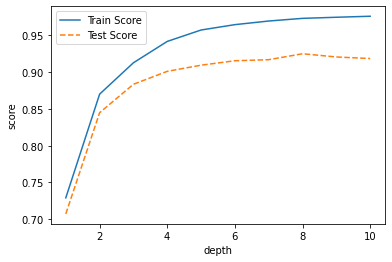

In [169]:
#모델 설명력 그래프 확인
plt.plot(para_depth,train_score,linestyle="-",label ="Train Score")
plt.plot(para_depth,test_score,linestyle="--",label= "Test Score")
plt.ylabel("score")
plt.xlabel("depth")
plt.legend()

## depth가 2일때 차이가 작으면서 높은 score를 가진다고 생각하여 2로 정했다.

In [170]:
# learning_rate: 학습률 변경에 따른 모델 성능
#train 및 test설명력 결과 저장
train_score =[]; test_score=[]
#learning_rate: 학습률 변경
para_lr =[lr * 0.1 for lr in range(1,10)]
for v_learning_rate in para_lr:
    gb=GradientBoostingRegressor(random_state=1234, n_estimators=54, min_samples_leaf=7, min_samples_split=36,max_depth=2, learning_rate=v_learning_rate)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_score_lr= pd.DataFrame()
df_score_lr["LearningRate"]=para_lr
df_score_lr["TrainScore"]=train_score
df_score_lr["TestScore"]=test_score

df_score_lr.round(3)

LearningRate  TrainScore  TestScore
0           0.1       0.870      0.845
1           0.2       0.909      0.887
2           0.3       0.925      0.901
3           0.4       0.931      0.903
4           0.5       0.936      0.893
5           0.6       0.943      0.901
6           0.7       0.943      0.891
7           0.8       0.944      0.890
8           0.9       0.941      0.883

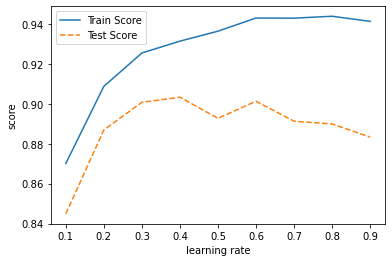

In [171]:
#모델 설명력 그래프 확인
plt.plot(para_lr,train_score,linestyle="-",label ="Train Score")
plt.plot(para_lr,test_score,linestyle="--",label= "Test Score")
plt.ylabel("score")
plt.xlabel("learning rate")
plt.legend()

## Learning Rate가 0.2일 때 차이가 가장 적고 적장한 score를 갖는다고 생각하여 0.2로 지정했다.

# 결론 도출

In [172]:
gb_final = GradientBoostingRegressor(criterion='mse', random_state = 1234, n_estimators=30, min_samples_leaf=11, min_samples_split=22,max_depth=4, learning_rate=0.1)
gb_final.fit(df_train_x,df_train_y)

print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.913
Score on test set: 0.876


In [173]:
gb_final = GradientBoostingRegressor(criterion='mae', random_state = 1234, n_estimators=30, min_samples_leaf=11, min_samples_split=22,max_depth=4, learning_rate=0.1)
gb_final.fit(df_train_x,df_train_y)

print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.895
Score on test set: 0.857


## mse가 mae에 비해 높은 score를 기록하는 것을 확인할 수 있다.

In [174]:
# feature_importances_: 설명변수의 중요도

In [175]:
v_feature_name = df_train_x.columns

df_importance= pd.DataFrame()
df_importance["Feature"]= v_feature_name
df_importance["Importance"]= gb_final.feature_importances_
#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

Feature  Importance
7                 age       0.354
0              cement       0.269
3               water       0.128
4    superplasticizer       0.090
1  blast_furnace_slag       0.064
6      fine_aggregate       0.057
5    coarse_aggregate       0.024
2             fly_ash       0.015

### importance를 보면 값이 높을수록 Feature의 중요성이 높음을 의미한다.

Text(0, 0.5, '변수')

/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib

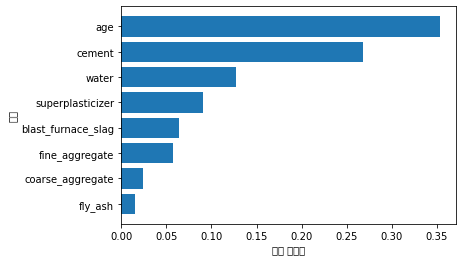

In [176]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance",ascending=True,inplace= True)
coordinates= range(len(df_importance))
plt.barh(y= coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")


# 설명변수의 중요도 결과 

## 콘크리트 강도에 가장 많은 영향력을 가지는 변수는 age(수명)이다.

## 적합한 모델 비교 및 선정

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [178]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [103]:
df_raw = pd.read_csv("3. Big Data 분석/Concrete.csv", engine="python")

df_raw.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate  age  strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30

In [104]:
lr_model = smf.ols(formula="strength ~ cement + water + blast_furnace_slag + fine_aggregate + age", data=df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth=4)
dt_model.fit(df_train_x, df_train_y)

rf_model = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf=6, min_samples_split=14, max_depth=4)
rf_model.fit(df_train_x, df_train_y)

gb_model = GradientBoostingRegressor(random_state=1234, n_estimators = 30,min_samples_leaf=11, min_samples_split=22, max_depth=4, learning_rate=0.1)
gb_model.fit(df_train_x, df_train_y)

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     266.4
Date:                Wed, 19 May 2021   Prob (F-statistic):          1.88e-182
Time:                        23:09:58   Log-Likelihood:                -3932.1
No. Observations:                1030   AIC:                             7876.
Df Residuals:                    1024   BIC:                             7906.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             85.7344      7

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

In [105]:
models = ["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]
mse, rmse, mae, mape = [],[],[],[]

In [106]:
lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [107]:
#의사결정나무
dt_y_pred = dt_model.predict(df_test_x)
#평가
mse.append(mean_squared_error(df_test_y,dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(mean_absolute_error(df_test_y,dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,dt_y_pred))

In [108]:
# 랜덤포레스트
rf_y_pred = rf_model.predict(df_test_x)
#평가
mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))

In [129]:
#그래디언트 부스팅
#예측 
gb_y_pred= gb_model.predict(df_test_x)
#평가
mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))

print("예측값 :", gb_y_pred.round(3))
print("예측값 평균 :", gb_y_pred.mean().round(3))

예측값 : [19.996 17.024 49.038 14.71  42.361 47.013 29.298 35.108 35.203 59.587
 11.72  24.376 47.703 33.301 41.199 34.448 26.574 22.75  36.177 13.435
 29.81  28.599 33.247 26.917 42.049 34.64  34.999 26.53  28.307 27.023
 40.058 29.571 37.488 44.462 47.247 27.787 23.349 34.072 19.429 32.918
 17.676 44.536 43.013 17.885 28.704 29.443 32.731 24.205 45.035 27.847
 43.813 17.487 53.552 47.473 47.536 57.484 37.211 47.387 33.674 32.858
 58.444 17.484 48.395 15.448 32.452 37.382 75.137 62.869 29.146 42.068
 36.229 11.272 42.259 31.834 45.698 59.132 26.662 24.099 34.692 63.715
 32.12  41.913 36.177 19.278 40.212 25.729 35.396 31.739 74.578 43.818
 38.245 49.571 15.631 31.695 63.226 17.992 32.942 51.184 24.783 23.276
 36.012 33.774 25.658 63.407 52.202 35.046 36.002 31.024 12.578 44.714
 31.386 24.949 16.37  64.921 28.849 23.225 17.209 54.593 32.953 37.762
 14.227 24.718 26.712 24.629 74.578 30.052 53.44  34.403 41.386 41.929
 23.971 64.712 15.248 33.375 46.146 55.206 39.993 41.761 32.164 29.65
 

/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib

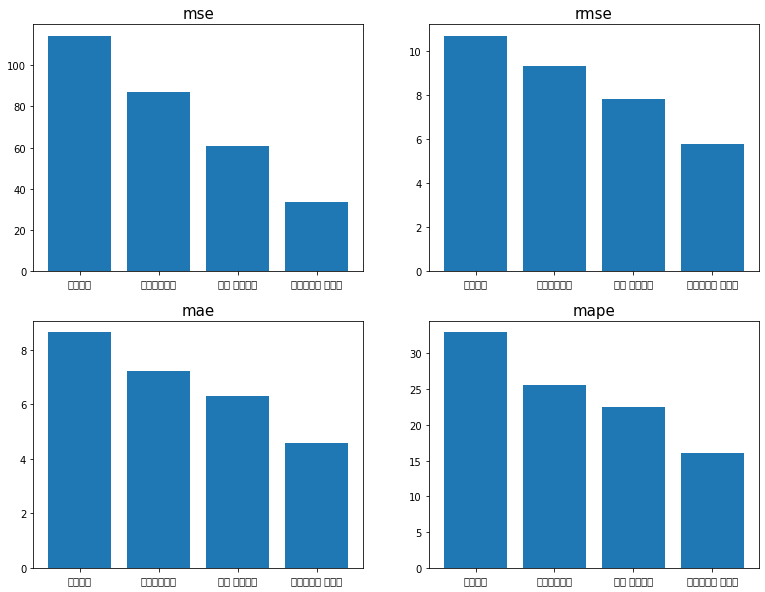

In [110]:
fig,ax = plt.subplots(2,2,figsize =(13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title("mse").set_fontsize(15)
ax[0,1].bar(models,rmse)
ax[0,1].set_title("rmse").set_fontsize(15)
ax[1,0].bar(models,mae)
ax[1,0].set_title("mae").set_fontsize(15)
ax[1,1].bar(models,mape)
ax[1,1].set_title("mape").set_fontsize(15)

## 모델을 비교했을 때 error가 가장 낮은 Gradient Boosting Model이 가장 적합하다.
# ====================================================

# 2. 주성분  분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib ; import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm 

In [2]:
df_raw = pd.read_csv("3. Big Data 분석/유방암.csv", encoding="cp949")
df_raw.head()

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0        음성        15.12         16.68           98.78      716.6   
1        양성        10.80          9.71           68.77      357.6   
2        음성        18.31         18.58          118.60     1041.0   
3        양성        14.92         14.93           96.45      686.9   
4        양성        12.89         13.12           81.89      515.9   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.08876           0.09588         0.07550              0.04079   
1          0.09594           0.05736         0.02531              0.01698   
2          0.08588           0.08468         0.08169              0.05814   
3          0.08098           0.08549         0.05539              0.03221   
4          0.06955           0.03729         0.02260              0.01171   

   mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0         0.1594  ...         17.77          20.24           117.70   
1         0.1381  ...         11.60          12.02            73.66   
2         0.1621  ...         21.31          26.36           139.20   
3         0.1687  ...         17.18          18.22           112.00   
4         0.1337  ...         13.62          15.54            87.40   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910             0.3331           0.3327   
1       414.0           0.14360             0.1257           0.1047   
2      1410.0           0.12340             0.2445           0.3538   
3       906.6           0.10650             0.2791           0.3151   
4       577.0           0.09616             0.1147           0.1186   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  

[5 rows x 31 columns]

In [3]:
df_raw["diagnosis"]=df_raw["diagnosis"].apply(lambda x: 1 if x =="양성" else 0)

In [4]:
df_raw.loc[(df_raw.diagnosis)]

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0           0        15.12         16.68           98.78      716.6   
1           1        10.80          9.71           68.77      357.6   
0           0        15.12         16.68           98.78      716.6   
1           1        10.80          9.71           68.77      357.6   
1           1        10.80          9.71           68.77      357.6   
..        ...          ...           ...             ...        ...   
0           0        15.12         16.68           98.78      716.6   
0           0        15.12         16.68           98.78      716.6   
0           0        15.12         16.68           98.78      716.6   
0           0        15.12         16.68           98.78      716.6   
1           1        10.80          9.71           68.77      357.6   

    mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0           0.08876           0.09588         0.07550              0.04079   
1           0.09594           0.05736         0.02531              0.01698   
0           0.08876           0.09588         0.07550              0.04079   
1           0.09594           0.05736         0.02531              0.01698   
1           0.09594           0.05736         0.02531              0.01698   
..              ...               ...             ...                  ...   
0           0.08876           0.09588         0.07550              0.04079   
0           0.08876           0.09588         0.07550              0.04079   
0           0.08876           0.09588         0.07550              0.04079   
0           0.08876           0.09588         0.07550              0.04079   
1           0.09594           0.05736         0.02531              0.01698   

    mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0          0.1594  ...         17.77          20.24           117.70   
1          0.1381  ...         11.60          12.02            73.66   
0          0.1594  ...         17.77          20.24           117.70   
1          0.1381  ...         11.60          12.02            73.66   
1          0.1381  ...         11.60          12.02            73.66   
..            ...  ...           ...            ...              ...   
0          0.1594  ...         17.77          20.24           117.70   
0          0.1594  ...         17.77          20.24           117.70   
0          0.1594  ...         17.77          20.24           117.70   
0          0.1594  ...         17.77          20.24           117.70   
1          0.1381  ...         11.60          12.02            73.66   

    worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0        989.5            0.1491             0.3331           0.3327   
1        414.0            0.1436             0.1257           0.1047   
0        989.5            0.1491             0.3331           0.3327   
1        414.0            0.1436             0.1257           0.1047   
1        414.0            0.1436             0.1257           0.1047   
..         ...               ...                ...              ...   
0        989.5            0.1491             0.3331           0.3327   
0        989.5            0.1491             0.3331           0.3327   
0        989.5            0.1491             0.3331           0.3327   
0        989.5            0.1491             0.3331           0.3327   
1        414.0            0.1436             0.1257           0.1047   

    worst_concave_points  worst_symmetry  worst_fractal_dimension  
0                0.12520          0.3415                  0.09740  
1                0.04603          0.2090                  0.07699  
0                0.12520          0.3415                  0.09740  
1                0.04603          0.2090                  0.07699  
1                0.04603          0.2090                  0.07699  
..                   ...             ...                      ...  
0       

In [5]:
df_raw_x = df_raw.drop("diagnosis",axis=1)
df_raw_y = df_raw["diagnosis"]
df_raw_y.head()
df_raw_x.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        15.12         16.68           98.78      716.6          0.08876   
1        10.80          9.71           68.77      357.6          0.09594   
2        18.31         18.58          118.60     1041.0          0.08588   
3        14.92         14.93           96.45      686.9          0.08098   
4        12.89         13.12           81.89      515.9          0.06955   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.09588         0.07550              0.04079         0.1594   
1           0.05736         0.02531              0.01698         0.1381   
2           0.08468         0.08169              0.05814         0.1621   
3           0.08549         0.05539              0.03221         0.1687   
4           0.03729         0.02260              0.01171         0.1337   

   mean_fractal_dimension  ...  worst_radius  worst_texture  worst_perimeter  \
0                 0.05986  ...         17.77          20.24           117.70   
1                 0.06400  ...         11.60          12.02            73.66   
2                 0.05425  ...         21.31          26.36           139.20   
3                 0.05669  ...         17.18          18.22           112.00   
4                 0.05581  ...         13.62          15.54            87.40   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910             0.3331           0.3327   
1       414.0           0.14360             0.1257           0.1047   
2      1410.0           0.12340             0.2445           0.3538   
3       906.6           0.10650             0.2791           0.3151   
4       577.0           0.09616             0.1147           0.1186   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  

[5 rows x 30 columns]

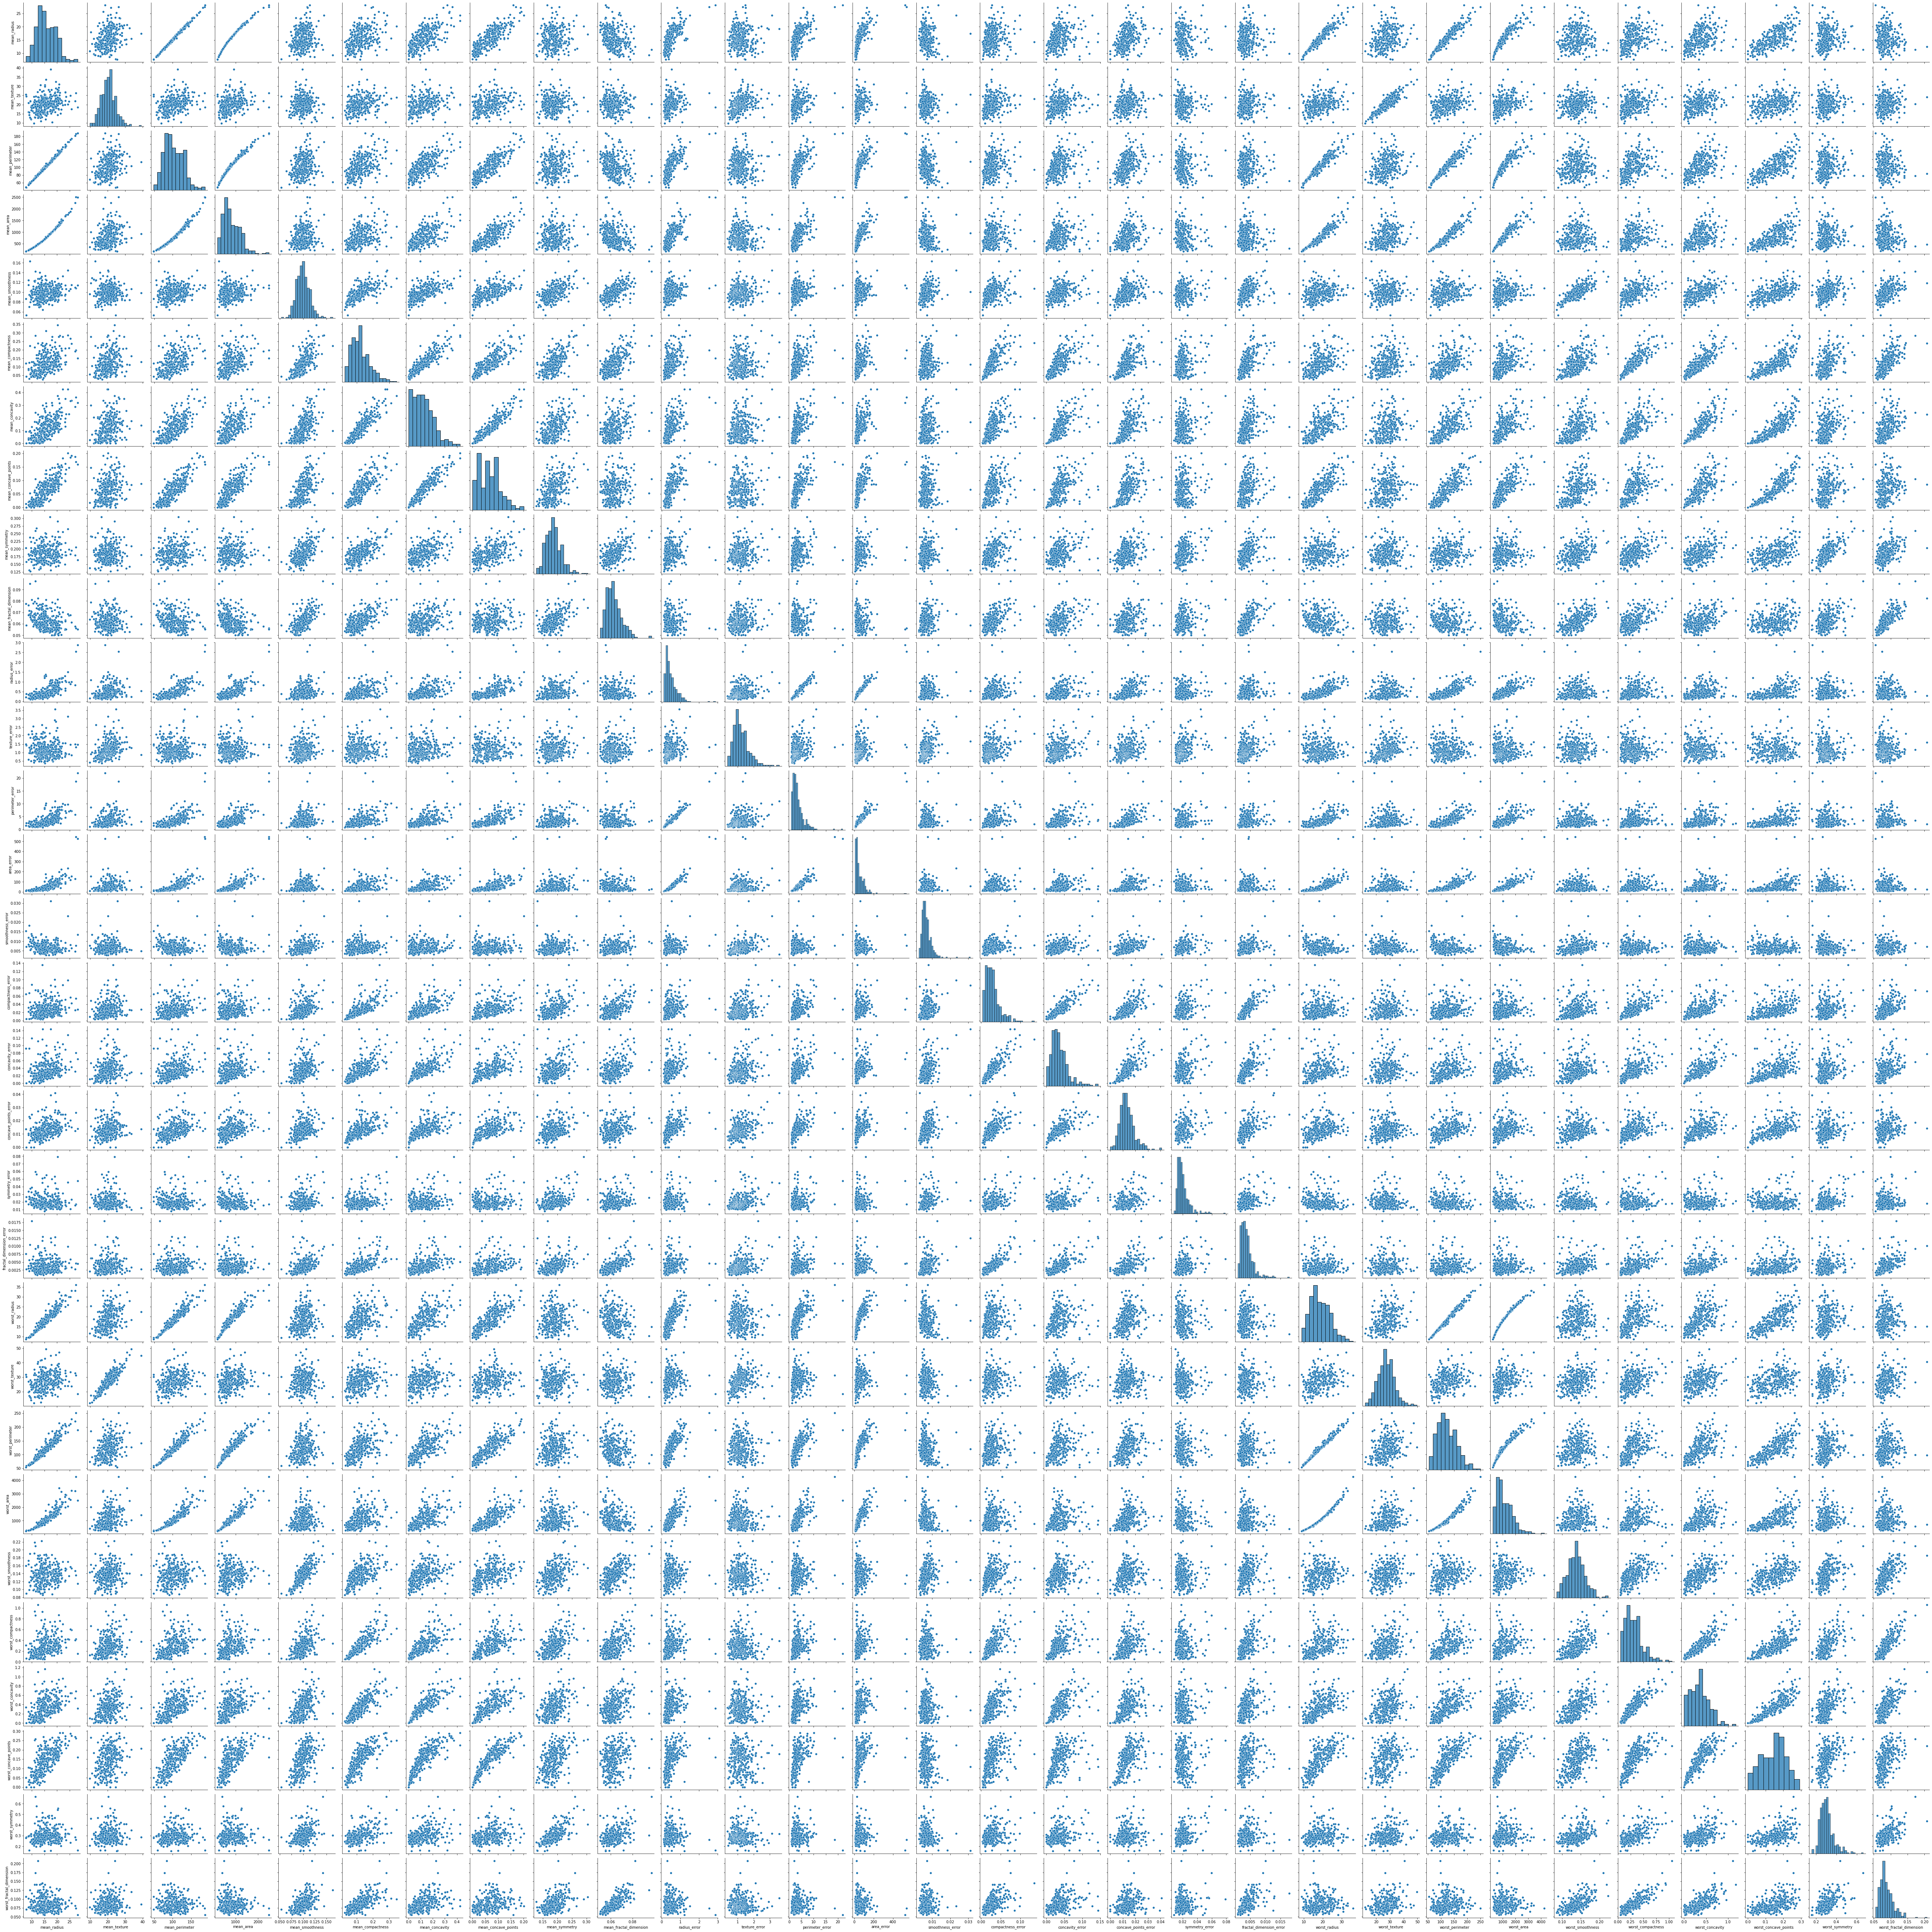

In [6]:
sns.pairplot(df_raw_x)

## 변수들 간 선형관계가 존재하는 것을 확인할 수 있다

# 데이터 scaling

In [7]:
df_raw_x.describe().round(3)
x_cols= df_raw_x.columns
scaler =StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
print("Scaled Data : \n{}".format(nd_scaled[:31].round(3)))
print("Shape: \n{}".format(nd_scaled.shape))

Scaled Data : 
[[-1.580e-01 -8.790e-01 -1.660e-01 -2.330e-01 -7.450e-01 -4.790e-01
  -5.510e-01 -6.280e-01 -9.970e-01 -3.930e-01 -6.930e-01 -1.741e+00
  -6.500e-01 -5.160e-01 -4.990e-01 -5.130e-01 -6.710e-01 -8.650e-01
  -5.920e-01 -4.570e-01 -1.490e-01 -1.156e+00 -1.540e-01 -2.250e-01
   4.910e-01  1.390e-01 -9.400e-02 -3.020e-01  5.260e-01  5.110e-01]
 [-1.313e+00 -2.561e+00 -1.329e+00 -1.150e+00 -2.400e-01 -1.154e+00
  -1.143e+00 -1.200e+00 -1.774e+00  1.840e-01 -9.950e-01 -1.649e+00
  -1.003e+00 -7.840e-01  3.250e-01 -1.023e+00 -1.067e+00 -1.361e+00
  -8.920e-01 -8.010e-01 -1.342e+00 -2.517e+00 -1.380e+00 -1.124e+00
   2.540e-01 -1.046e+00 -1.159e+00 -1.480e+00 -1.388e+00 -5.070e-01]
 [ 6.950e-01 -4.210e-01  6.030e-01  5.960e-01 -9.470e-01 -6.750e-01
  -4.780e-01 -2.120e-01 -8.990e-01 -1.174e+00 -7.340e-01 -1.505e+00
  -7.150e-01 -4.710e-01 -1.419e+00 -1.058e+00 -9.360e-01 -1.127e+00
  -1.099e+00 -1.269e+00  5.350e-01 -1.430e-01  4.450e-01  4.320e-01
  -6.130e-01 -3.670e-01  4.000e

In [8]:
df_scaled = pd.DataFrame(nd_scaled, columns= x_cols)
df_scaled.head().round(3)
df_scaled.describe().round(3)

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
count      320.000       320.000         320.000    320.000          320.000   
mean         0.000        -0.000          -0.000      0.000            0.000   
std          1.002         1.002           1.002      1.002            1.002   
min         -2.144        -2.561          -2.137     -1.629           -3.284   
25%         -0.711        -0.691          -0.706     -0.725           -0.641   
50%         -0.156        -0.026          -0.114     -0.242           -0.055   
75%          0.751         0.525           0.717      0.684            0.611   
max          3.316         4.574           3.313      4.327            4.501   

       mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
count           320.000         320.000              320.000        320.000   
mean             -0.000           0.000               -0.000          0.000   
std               1.002           1.002                1.002          1.002   
min              -1.690          -1.442               -1.607         -2.164   
25%              -0.737          -0.819               -0.899         -0.724   
50%              -0.139          -0.133               -0.041         -0.077   
75%               0.567           0.560                0.595          0.580   
max               3.889           3.597                3.221          4.272   

       mean_fractal_dimension  ...  worst_radius  worst_texture  \
count                 320.000  ...       320.000        320.000   
mean                    0.000  ...         0.000          0.000   
std                     1.002  ...         1.002          1.002   
min                    -1.772  ...        -1.906         -2.517   
25%                    -0.728  ...        -0.751         -0.654   
50%                    -0.172  ...        -0.157         -0.057   
75%                     0.561  ...         0.749          0.614   
max                     4.842  ...         3.382          3.694   

       worst_perimeter  worst_area  worst_smoothness  worst_compactness  \
count          320.000     320.000           320.000            320.000   
mean             0.000      -0.000            -0.000              0.000   
std              1.002       1.002             1.002              1.002   
min             -1.914      -1.422            -2.234             -1.477   
25%             -0.771      -0.750            -0.645             -0.734   
50%             -0.122      -0.257             0.016             -0.182   
75%              0.714       0.633             0.581              0.554   
max              3.564       4.876             3.648              4.283   

       worst_concavity  worst_concave_points  worst_symmetry  \
count          320.000               320.000         320.000   
mean            -0.000                -0.000           0.000   
std              1.002                 1.002           1.002   
min             -1.648                -2.165          -2.146   
25%             -0.794                -0.813          -0.670   
50%             -0.062                 0.107          -0.134   
75%              0.611                 0.768           0.332   
max              3.816                 2.166           5.179   

       worst_fractal_dimension  
count                  320.000  
mean                     0.000  
std                      1.002  
min                     -1.602  
25%                     -0.683  
50%                     -0.225  
75%                      0.528  
max                      6.004  

[8 rows x 30 columns]

# 주성분 분석

In [9]:
pca = PCA(n_components=30)
nd_pca = pca.fit_transform(df_scaled)
print("PCA Data : \n{}".format(nd_pca[:31]))
print("Shape: \n".format(nd_pca.shape))


PCA Data : 
[[-2.00389702e+00 -2.58058106e-01 -1.84890296e+00 -1.31467512e+00
   6.24726217e-01  7.89451676e-01  1.32108678e-01 -1.01407999e+00
   4.97472568e-01 -5.11154359e-01 -1.59476526e-01 -3.85870988e-04
  -1.78211309e-02 -6.72126362e-02  1.47199795e-01 -7.13592324e-02
  -1.35801647e-01  1.60993793e-01 -4.78160362e-01 -2.37147886e-01
   2.44216713e-01  1.64854061e-01  6.63767950e-02  1.80669748e-01
  -1.14558313e-03  8.63622562e-03 -6.86072623e-02  6.04830294e-04
   2.58020639e-02  1.41585915e-02]
 [-5.84906746e+00  2.11647637e-01 -1.68087360e-01 -2.95641861e+00
   1.83054388e+00 -4.05165090e-01  3.23010727e-01 -5.26610206e-01
   4.11091221e-01  1.33667857e-01 -6.39117982e-01 -1.75471721e-01
  -2.09690997e-01 -9.71313041e-02 -2.06895790e-01  1.35980861e-01
  -1.49034285e-01  9.55093848e-02 -1.27211295e-01 -1.48419478e-01
   1.08089523e-01  1.68014456e-01 -6.48893521e-02 -4.34769760e-02
   1.49143900e-02 -4.33905539e-02 -4.97770561e-02  1.20852801e-02
   1.49415519e-02  3.80181172

In [10]:
df_pca = pd.DataFrame(nd_pca, columns= ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6","Prin7","Prin8","Prin9","Prin10","Prin11","Prin12","Prin13","Prin14","Prin15","Prin16","Prin17","Prin18","Prin19","Prin20","Prin21","Prin22","Prin23","Prin24","Prin25","Prin26","Prin27","Prin28","Prin29","Prin30"])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0    -0.157678     -0.879112       -0.165550  -0.232872        -0.744948   
1    -1.312779     -2.560965       -1.328928  -1.150194        -0.240274   
2     0.695279     -0.420644        0.602798   0.596040        -0.947380   
3    -0.211154     -1.301385       -0.255876  -0.308762        -1.291796   
4    -0.753945     -1.738136       -0.820314  -0.745704        -2.095198   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0         -0.479220       -0.550769            -0.628488      -0.997431   
1         -1.153621       -1.143404            -1.199934      -1.773612   
2         -0.675307       -0.477679            -0.212084      -0.899042   
3         -0.661126       -0.788224            -0.834410      -0.658535   
4         -1.505004       -1.175403            -1.326415      -1.933950   

   mean_fractal_dimension  ...    Prin21    Prin22    Prin23    Prin24  \
0               -0.392627  ...  0.244217  0.164854  0.066377  0.180670   
1                0.184077  ...  0.108090  0.168014 -0.064889 -0.043477   
2               -1.174101  ... -0.034971 -0.296615 -0.089094 -0.111252   
3               -0.834209  ... -0.009942 -0.103717  0.066354  0.105339   
4               -0.956793  ...  0.072100  0.129423 -0.003367  0.020147   

     Prin25    Prin26    Prin27    Prin28    Prin29    Prin30  
0 -0.001146  0.008636 -0.068607  0.000605  0.025802  0.014159  
1  0.014914 -0.043391 -0.049777  0.012085  0.014942  0.003802  
2 -0.078950 -0.050892  0.067030  0.030987  0.012601 -0.003082  
3 -0.013316 -0.011097 -0.021080  0.033756 -0.021498  0.005064  
4 -0.045760  0.052844 -0.065091  0.017130  0.021292 -0.001706  

[5 rows x 60 columns]

# 주성분 분석 및 결과: 고유값(eigenvalue) 확인 및 주성분 개수 결정

In [17]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"]= [l for l in range(1,31)]
df_pca_stat["EigenValues"]= pca.explained_variance_
df_pca_stat["EigenValueRatio"]= pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"]= np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

PrinNo  EigenValues  EigenValueRatio  CumEigenValueRatio
0        1       13.125            0.436               0.436
1        2        5.982            0.199               0.635
2        3        3.116            0.104               0.738
3        4        1.950            0.065               0.803
4        5        1.319            0.044               0.847
5        6        1.252            0.042               0.889
6        7        0.749            0.025               0.914
7        8        0.534            0.018               0.931
8        9        0.376            0.012               0.944
9       10        0.321            0.011               0.954
10      11        0.290            0.010               0.964
11      12        0.266            0.009               0.973
12      13        0.173            0.006               0.979
13      14        0.148            0.005               0.984
14      15        0.107            0.004               0.987
15      16        0.070            0.002               0.989
16      17        0.064            0.002               0.992
17      18        0.054            0.002               0.993
18      19        0.048            0.002               0.995
19      20        0.033            0.001               0.996
20      21        0.031            0.001               0.997
21      22        0.023            0.001               0.998
22      23        0.021            0.001               0.999
23      24        0.014            0.000               0.999
24      25        0.011            0.000               0.999
25      26        0.009            0.000               1.000
26      27        0.006            0.000               1.000
27      28        0.002            0.000               1.000
28      29        0.001            0.000               1.000
29      30        0.000            0.000               1.000

# 주성분 분석 및 결과 : scree plot 확인 및 주성분 개수 결정


In [18]:
plt.plot(df_pca_stat["PrinNo"],df_pca_stat["EigenValues"],label ="고유값")
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc= "best")

/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib

/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib

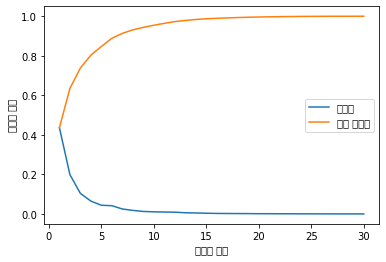

In [13]:
plt.plot(df_pca_stat["PrinNo"],df_pca_stat["EigenValueRatio"],label = "고유값")
plt.plot(df_pca_stat["PrinNo"],df_pca_stat["CumEigenValueRatio"],label = "누적 고유값")
plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

# 주성분 분석 및 결과: 고유 벡터( Eigenvector)확인 및 해석

In [14]:
x_cols= pd.DataFrame({"Feature": df_raw_x.columns})
df_eigenvector = pd.concat([x_cols,pd.DataFrame(pca.components_.T*-1, columns= ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6","Prin7","Prin8","Prin9","Prin10","Prin11","Prin12","Prin13","Prin14","Prin15","Prin16","Prin17","Prin18","Prin19","Prin20","Prin21","Prin22","Prin23","Prin24","Prin25","Prin26","Prin27","Prin28","Prin29","Prin30"])], axis=1)
df_eigenvector.round(3)

Feature  Prin1  Prin2  Prin3  Prin4  Prin5  Prin6  Prin7  \
0               mean_radius -0.214  0.238  0.026  0.026 -0.007 -0.068  0.156   
1              mean_texture -0.110  0.046  0.038 -0.604  0.042  0.101 -0.030   
2            mean_perimeter -0.225  0.218  0.024  0.029 -0.010 -0.068  0.147   
3                 mean_area -0.213  0.245 -0.002  0.040 -0.010 -0.035  0.082   
4           mean_smoothness -0.151 -0.194  0.058  0.201 -0.037  0.474  0.074   
5          mean_compactness -0.240 -0.163  0.046  0.053 -0.024 -0.040 -0.025   
6            mean_concavity -0.261 -0.046  0.003  0.046 -0.060 -0.019  0.107   
7       mean_concave_points -0.260  0.039  0.035  0.086 -0.008  0.067  0.154   
8             mean_symmetry -0.147 -0.197  0.047  0.138  0.428  0.061  0.054   
9    mean_fractal_dimension -0.076 -0.351 -0.000  0.080 -0.056  0.104 -0.290   
10             radius_error -0.202  0.158 -0.205  0.088  0.080  0.152 -0.362   
11            texture_error -0.050 -0.062 -0.346 -0.359  0.182  0.208  0.037   
12          perimeter_error -0.208  0.132 -0.226  0.075  0.079  0.091 -0.359   
13               area_error -0.195  0.187 -0.168  0.100  0.054  0.133 -0.386   
14         smoothness_error -0.033 -0.125 -0.373  0.014 -0.189  0.341  0.325   
15        compactness_error -0.179 -0.209 -0.194 -0.083 -0.104 -0.281 -0.018   
16          concavity_error -0.185 -0.154 -0.238 -0.054 -0.166 -0.252  0.159   
17     concave_points_error -0.186 -0.074 -0.272  0.006 -0.119 -0.077  0.253   
18           symmetry_error -0.064 -0.147 -0.285  0.057  0.550 -0.119  0.127   
19  fractal_dimension_error -0.127 -0.246 -0.237 -0.049 -0.181 -0.192 -0.179   
20             worst_radius -0.221  0.225  0.090  0.008  0.003 -0.013  0.027   
21            worst_texture -0.106  0.011  0.148 -0.609  0.087  0.156 -0.028   
22          worst_perimeter -0.233  0.202  0.083  0.008 -0.000 -0.034  0.020   
23               worst_area -0.215  0.234  0.064  0.020 -0.005  0.019 -0.054   
24         worst_smoothness -0.128 -0.193  0.229  0.054 -0.123  0.481  0.105   
25        worst_compactness -0.199 -0.190  0.209 -0.066 -0.063 -0.172 -0.108   
26          worst_concavity -0.225 -0.120  0.180 -0.050 -0.118 -0.153  0.059   
27     worst_concave_points -0.247 -0.010  0.180  0.034 -0.050 -0.010  0.164   
28           worst_symmetry -0.111 -0.184  0.239  0.041  0.524 -0.099  0.084   
29  worst_fractal_dimension -0.124 -0.289  0.208 -0.046 -0.126 -0.068 -0.315   

    Prin8  Prin9  ...  Prin21  Prin22  Prin23  Prin24  Prin25  Prin26  Prin27  \
0  -0.097 -0.196  ...   0.166   0.074  -0.078   0.131   0.070  -0.082   0.168   
1   0.138  0.097  ...  -0.251   0.109  -0.136  -0.183  -0.070  -0.017   0.040   
2  -0.106 -0.182  ...   0.113   0.072  -0.027   0.048   0.095  -0.072   0.168   
3  -0.048 -0.229  ...  -0.032  -0.035   0.137   0.060  -0.114   0.142  -0.543   
4  -0.196 -0.012  ...   0.076   0.107   0.058  -0.064   0.008  -0.057  -0.069   
5  -0.136  0.011  ...  -0.184   0.053  -0.350  -0.201   0.202   0.266  -0.169   
6  -0.057  0.024  ...  -0.259  -0.314   0.112   0.046   0.039  -0.637  -0.129   
7  -0.191 -0.009  ...   0.092  -0.325   0.099   0.065  -0.168   0.527   0.291   
8  -0.219  0.176  ...   0.100  -0.003   0.064   0.021  -0.024  -0.026   0.008   
9  -0.176 -0.104  ...   0.116   0.181   0.092   0.247  -0.011  -0.079   0.125   
10  0.143  0.162  ...   0.233  -0.062  -0.433   0.426   0.005  -0.028  -0.235   
11 -0.493 -0.107  ...  -0.112   0.059  -0.136  -0.116  -0.044  -0.004   0.020   
12  0.091  0.239  ...   0.152   0.111   0.531  -0.321  -0.063   0.067  -0.131   
13  0.195  0.061  ...  -0.311   0.033  -0.125  -0.075   0.094  -0.005   0.409   
14  0.453 -0.252  ...   0.068   0.091   0.060  -0.012   0.052   0.003  -0.001   
15  0.071 -0.090  ...   0.119  -0.132   0.082   0.015   0.404  -0.063  -0.016   
16  0.163  0.141  ...   0.271  -0.050  -0.231  -0.240  -0.374   0.090   0.031   
17 -0.106  0.534  ...  -0.214  -0.226   0.079   0.164   0.074  -0.012   0.048   


In [15]:
x_var =["Prin1","Prin2","Prin3","Prin4"]
df_pca_const = sm.add_constant(df_pca[x_var])

# 산점도 행렬

<ipython-input-16-576a5e3602af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scatter['diagnosis'] =df_raw_y


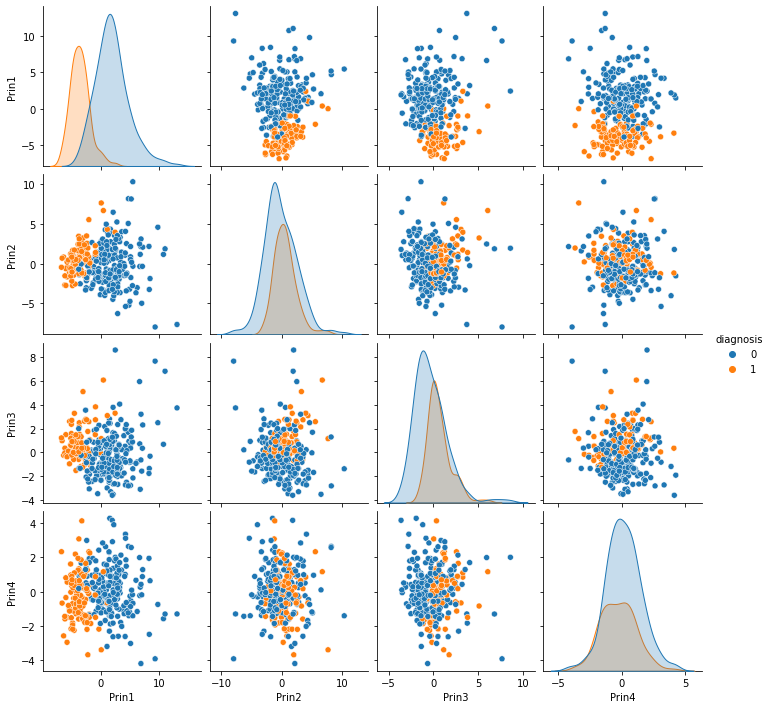

In [16]:
df_scatter =df_pca[["Prin1","Prin2","Prin3","Prin4"]]
df_scatter['diagnosis'] =df_raw_y 
sns.pairplot(df_scatter,hue="diagnosis")

## 기여율이 약한 주성분 3개 (주성분 4~6)를 제외하여 설명력 저하됨.
## 주성분 회귀분석의 회귀계수는 모두 유의함. 